In [531]:
!pip show numpy

Name: numpy
Version: 1.26.4
Summary: Fundamental package for array computing in Python
Home-page: https://numpy.org
Author: Travis E. Oliphant et al.
Author-email: 
License: Copyright (c) 2005-2023, NumPy Developers.
        All rights reserved.
        
        Redistribution and use in source and binary forms, with or without
        modification, are permitted provided that the following conditions are
        met:
        
            * Redistributions of source code must retain the above copyright
               notice, this list of conditions and the following disclaimer.
        
            * Redistributions in binary form must reproduce the above
               copyright notice, this list of conditions and the following
               disclaimer in the documentation and/or other materials provided
               with the distribution.
        
            * Neither the name of the NumPy Developers nor the names of any
               contributors may be used to endorse or promo

In [532]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder


In [533]:
data = pd.read_csv('/Users/dhruv/Dhruv/Apcela/RFQ.csv')

In [534]:
data

,Rec Num,RFQ,Date requested,Date Received,A Loc Address,A Loc City,A Loc State,A Loc Zip,Z Loc Address,Z Loc City,Z Loc State,Z Loc Zip,Cir Type,Port Speed,Term,Provider,A Loc Local Loop Provider,MRC,NRC,RTD Latency
0,4649.0,RFQ-234,2/22/2019,2/28/2019,1400 Federal,Carteret,NJ,07008,350 East Cermak,Chicago,IL,60616,Tier 0,100G,36,Spread,NaN,"$115,000","$10,000",13.000
1,4650.0,RFQ-234,2/22/2019,2/28/2019,1400 Federal,Carteret,NJ,07008,350 East Cermak,Chicago,IL,60616,Tier 1,100G,36,Spread,NaN,"$61,250","$10,000",14.070
2,4651.0,RFQ-234,2/26/2019,2/28/2019,1400 Federal,Carteret,NJ,07008,350 East Cermak,Chicago,IL,60616,Tier 2,100G,36,Spread,NaN,"$22,500","$10,000",14.270
3,4652.0,RFQ-234,2/26/2019,2/28/2019,1400 Federal,Carteret,NJ,07008,350 East Cermak,Chicago,IL,60616,Carrier Grade,100G,36,Spread,NaN,"$7,500","$3,000",15.900
4,4653.0,RFQ-234,2/26/2019,2/28/2019,1400 Federal,Carteret,NJ,07008,350 East Cermak,Chicago,IL,60616,Tier 0,100G,12,Spread,NaN,"$125,000","$10,000",13.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7835,13311.0,RFQ-628.2,2/8/2024,NaN,Tufsteen 1,Hoofddorp,Netherlands,2132 NT,Luttenbergweg 4,Amsterdam,Netherlands,1101 EC,Microwave,1G,24,DigitalWell,NaN,No Bid,NaN,NaN
7836,13312.0,RFQ-628.2,2/8/2024,NaN,Tufsteen 1,Hoofddorp,Netherlands,2132 NT,Luttenbergweg 4,Amsterdam,Netherlands,1101 EC,Microwave,1G,36,DigitalWell,NaN,No Bid,NaN,NaN
7837,13313.0,RFQ-628.2,2/8/2024,2/8/2024,Tufsteen 1,Hoofddorp,Netherlands,2132 NT,Luttenbergweg 4,Amsterdam,Netherlands,1101 EC,Microwave,1G,12,EXA,NaN,No Bid,NaN,NaN
7838,13314.0,RFQ-628.2,2/8/2024,2/8/2024,Tufsteen 1,Hoofddorp,Netherlands,2132 NT,Luttenbergweg 4,Amsterdam,Netherlands,1101 EC,Microwave,1G,24,EXA,NaN,No Bid,NaN,NaN


In [535]:
data.columns

Index(['Rec Num', 'RFQ', 'Date requested', 'Date Received', 'A Loc Address',
       'A Loc City', 'A Loc State', 'A Loc Zip', 'Z Loc Address', 'Z Loc City',
       'Z Loc State', 'Z Loc Zip', 'Cir Type', 'Port Speed', 'Term',
       'Provider', 'A Loc Local Loop Provider', 'MRC', 'NRC', 'RTD Latency'],
      dtype='object')

In [536]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7840 entries, 0 to 7839
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rec Num                    7840 non-null   float64
 1   RFQ                        7840 non-null   object 
 2   Date requested             7803 non-null   object 
 3   Date Received              7059 non-null   object 
 4   A Loc Address              7802 non-null   object 
 5   A Loc City                 7696 non-null   object 
 6   A Loc State                7636 non-null   object 
 7   A Loc Zip                  6440 non-null   object 
 8   Z Loc Address              6976 non-null   object 
 9   Z Loc City                 6853 non-null   object 
 10  Z Loc State                6777 non-null   object 
 11  Z Loc Zip                  5306 non-null   object 
 12  Cir Type                   7835 non-null   object 
 13  Port Speed                 7538 non-null   objec

In [537]:
print(data['MRC'].describe())
print()
no_bid_count = data[data['MRC'] == 'No Bid'].shape[0]
print(no_bid_count)

count       7817
unique      2407
top       No Bid
freq        1308
Name: MRC, dtype: object

1308


In [538]:
df = pd.read_csv('/Users/dhruv/Dhruv/Apcela/RFQ.csv')

In [539]:
# Filter rows where MRC is not "No Bid"
filtered_df = df[df['MRC'] != 'No Bid'].copy()

filtered_df['MRC'] = filtered_df['MRC'].str.replace(r'[\$,]', '', regex=True)
filtered_df['MRC'] = pd.to_numeric(filtered_df['MRC'], errors='coerce')
filtered_df['MRC']

0       115000.0
1        61250.0
2        22500.0
3         7500.0
4       125000.0
          ...   
7826      1350.0
7827      1225.0
7828       795.0
7829       777.0
7830       769.0
Name: MRC, Length: 6532, dtype: float64

In [540]:
filtered_df['MRC'].describe()

count      5316.000000
mean       3479.738962
std        7396.662780
min          24.000000
25%         950.000000
50%        1536.000000
75%        3049.250000
max      125000.000000
Name: MRC, dtype: float64

In [541]:
len(filtered_df['MRC'])

6532

In [542]:
mrc_greater_15000_count = filtered_df[filtered_df['MRC'] > 10000].shape[0]
mrc_greater_15000_count

335

In [543]:
filtered_df['MRC'].describe()

count      5316.000000
mean       3479.738962
std        7396.662780
min          24.000000
25%         950.000000
50%        1536.000000
75%        3049.250000
max      125000.000000
Name: MRC, dtype: float64

In [544]:
print(len(data['Provider'].unique()))
print(len(data['Term'].unique()))
print(len(data['Port Speed'].unique()))
print(len(data['Cir Type'].unique()))
print()
print(len(data['A Loc City'].unique()))
print(len(data['A Loc State'].unique()))
print(len(data['Z Loc City'].unique()))
print(len(data['Z Loc State'].unique()))

138
41
105
183

243
104
99
63


In [545]:
filter_state_data = df[df['MRC'] != 'No Bid'].copy()

filter_state_data['MRC'] = filter_state_data['MRC'].str.replace(r'[\$,]', '', regex=True)
filter_state_data['MRC'] = pd.to_numeric(filter_state_data['MRC'], errors='coerce')
filter_state_data['MRC']

0       115000.0
1        61250.0
2        22500.0
3         7500.0
4       125000.0
          ...   
7826      1350.0
7827      1225.0
7828       795.0
7829       777.0
7830       769.0
Name: MRC, Length: 6532, dtype: float64

In [546]:
filter_state_data.columns

Index(['Rec Num', 'RFQ', 'Date requested', 'Date Received', 'A Loc Address',
       'A Loc City', 'A Loc State', 'A Loc Zip', 'Z Loc Address', 'Z Loc City',
       'Z Loc State', 'Z Loc Zip', 'Cir Type', 'Port Speed', 'Term',
       'Provider', 'A Loc Local Loop Provider', 'MRC', 'NRC', 'RTD Latency'],
      dtype='object')

In [547]:
filter_state_data = filter_state_data[filter_state_data['MRC'] <= 10000]
filter_state_data.describe()

,Rec Num,MRC
count,4981.000000,4981.000000
mean,9030.550521,2108.885569
std,2457.925967,1858.968328
min,4652.000000,24.000000
25%,6955.000000,910.000000
50%,9009.000000,1450.000000
75%,11216.000000,2618.000000
max,13306.000000,10000.000000


In [548]:
filter_state_data['A Loc City'] = filter_state_data['A Loc City'].str.lower()
filter_state_data['A Loc State'] = filter_state_data['A Loc State'].str.lower()

print(len(filter_state_data['A Loc City'].unique()))
city_corrections = {
    '2-4-1, marunouchi,chiyoda-ku tokyo': 'tokyo',
    'cartaret': 'carteret',
    'chicago ': 'chicago',
    'frankfurt am main': 'frankfurt',
    'hongkong': 'hong kong',
    'kwai chung, nt': 'kwai chung',
    'munchen': 'munich',
    'new york city': 'new york',
    'nan jing xi lu, jingan qu, shanghai shi': 'shanghai',
    'pudong new area, shanghai': 'shanghai',
    'yangpu district, shanghai': 'shanghai',
    'rio de janerio': 'rio de janeiro',
    'rio de janerio/rj': 'rio de janeiro',
    'rmz ecoworld, campus 6b, 5th & part 6th floor (units 501 & 502 & 601)\nsarjapur, marathalli outer ring road \ndevarabeesanahalli village, varthur hobli\nbangalore east taluk \nbangalore – 560 103': 'bangalore',
    'sao paolo': 'sao paulo',
    'st. louis': 'st louis',
    'washington ': 'washington'
}
filter_state_data['A Loc City'] = filter_state_data['A Loc City'].replace(city_corrections)



236


In [549]:
filter_state_data['A Loc State'].unique()

array(['nj', 'dc', 'va', 'uk', 'ks', 'tx', 'ga', 'il', 'mn', 'ny',
       'germany', 'co', 'ct', 'oh', 'ca', 'south kensington', 'ireland',
       'wa', 'hong kong', 'peru', nan, 'mexico', 'india', 'china',
       'california', 'ontario', 'ky', 'russia', 'md', 'south africa',
       'netherlands', 'japan', 'hk', 'france', 'swizterland', 'italy',
       'sc', 'bangalore', 'ut', 'canada', 'pa', 'switzerland',
       'london england', 'ciudad de mexico', 'uae', 'fl', 'pud - china',
       'brasil', 'sweden', 'england', 'australia', 'alberta', 'nicaragua',
       'honduras', 'quebec', 'brazil', 'ma', 'london', 'ok', 'switz.',
       'kow', 'in', 'poland', 'ca ', 'czechia', 'id', 'new zealand',
       'new york ', 'mi', 'tn', 'on', 'nsw-australia', 'united kingdom',
       'cyprus', 'on, canada', ' ab,canada', 'nc', 'wi', 'az', 'or',
       'united arab emirates', 'romania', 'qc', 'ab', 'spain', 'colombia',
       'il ', 'nb', 'quebec-canada', 'lincolnshire',
       'santa catarina (sc)', '

In [550]:
state_country_mapping = {
    'nj': 'nj', 'dc': 'dc', 'va': 'va', 'ks': 'ks', 'tx': 'tx', 'ga': 'ga', 'il': 'il', 'mn': 'mn', 
    'ny': 'ny', 'co': 'co', 'ct': 'ct', 'oh': 'oh', 'ca': 'ca', 'wa': 'wa', 'sc': 'sc', 'ut': 'ut',
    'pa': 'pa', 'fl': 'fl', 'ma': 'ma', 'ok': 'ok', 'mi': 'mi', 'tn': 'tn', 'nc': 'nc', 'wi': 'wi', 
    'az': 'az', 'or': 'or', 'mo': 'mo',
    
    'germany': 'germany', 'ireland': 'ireland', 'hong kong': 'hong kong', 'peru': 'peru',
    'mexico': 'mexico', 'india': 'india', 'china': 'china', 'russia': 'russia', 'south africa': 'south africa',
    'netherlands': 'netherlands', 'japan': 'japan', 'hk': 'hong kong', 'france': 'france', 
    'swizterland': 'switzerland', 'switzerland': 'switzerland', 'italy': 'italy', 'prc': 'china', 
    'canada': 'canada', 'london england': 'uk', 'uae': 'uae', 'ciudad de mexico': 'mexico', 
    'brasil': 'brazil', 'sweden': 'sweden', 'england': 'uk', 'australia': 'australia', 
    'alberta': 'canada', 'nicaragua': 'nicaragua', 'honduras': 'honduras', 'quebec': 'canada',
    'brazil': 'brazil', 'london': 'uk', 'jamaica': 'jamaica', 'switz.': 'switzerland', 'kow': 'hong kong',
    'in': 'india', 'poland': 'poland', 'czechia': 'czech republic', 'id': 'indonesia', 
    'new zealand': 'new zealand', 'united kingdom': 'uk', 'israel': 'israel', 'cyprus': 'cyprus', 
    'greece': 'greece', 'on, canada': 'canada', 'ab,canada': 'canada', 'united arab emirates': 'uae', 
    'romania': 'romania', 'qc': 'canada', 'ab': 'canada', 'spain': 'spain', 'colombia': 'colombia', 
    'nb': 'canada', 'quebec-canada': 'canada', 'lincolnshire': 'uk', 'santa catarina (sc)': 'brazil',
    'ontario - canada': 'canada', 'sp, brazil': 'brazil', 'beligium': 'belgium', 'pudong': 'china',
    'taipei': 'taiwan', 'bangalore':'india'
}

filter_state_data['A Loc State'] = filter_state_data['A Loc State'].str.strip().str.lower()
filter_state_data['A Loc State'] = filter_state_data['A Loc State'].replace(state_country_mapping)


In [551]:
filter_state_data['A Loc State'].unique()

array(['nj', 'dc', 'va', 'uk', 'ks', 'tx', 'ga', 'il', 'mn', 'ny',
       'germany', 'co', 'ct', 'oh', 'ca', 'south kensington', 'ireland',
       'wa', 'hong kong', 'peru', nan, 'mexico', 'india', 'china',
       'california', 'ontario', 'ky', 'russia', 'md', 'south africa',
       'netherlands', 'japan', 'france', 'switzerland', 'italy', 'sc',
       'ut', 'canada', 'pa', 'uae', 'fl', 'pud - china', 'brazil',
       'sweden', 'australia', 'nicaragua', 'honduras', 'ma', 'ok',
       'poland', 'czech republic', 'indonesia', 'new zealand', 'new york',
       'mi', 'tn', 'on', 'nsw-australia', 'cyprus', 'nc', 'wi', 'az',
       'or', 'romania', 'spain', 'colombia', 'nsw', 'mo', 'belgium',
       'taiwan'], dtype=object)

In [552]:
import pandas as pd
import numpy as np

In [553]:
#Let us start by cleaning 'Term'

filter_state_data['Term'].unique()

array(['36', '12', '24', '3 yr', '1 yr', '1 Yr', '2 Yr', '3 Yr', '3Yr',
       '1yr', '2yr', '2Yr', '12 mo', '36 mo', 'MTM', '36 month',
       '36 months', '24 Mos', '12 Mo', '12 Month', '36 Month', '12 Mo.',
       '36 Mo. ', '28', 'co-term', '60', '24 Month', '25', '18',
       '12 month', '10G', '1G', 'Co-Term', '12, 24, 36', 'Co-terminous',
       'Coterminous', '13'], dtype=object)

In [554]:
# filter_state_data

In [555]:
def clean_term(term):
    term = str(term).strip().lower()

    if 'mtm' in term:
        return '12'
    elif 'co-term' in term or 'coterminous' in term:
        return '12'
    elif 'yr' in term or 'year' in term:
        parts = term.split()
        return str(int(parts[0]) * 12) if parts[0].isdigit() else '12'
    elif 'mo' in term or 'month' in term:
        return ''.join(filter(str.isdigit, term))
    elif term.isdigit():
        return term
    elif ',' in term:
        return term.split(',')[0].strip()

    return '12'



filter_state_data['Term_Cleaned'] = filter_state_data['Term'].apply(clean_term)

print(filter_state_data['Term_Cleaned'].unique())


['36' '12' '24' '28' '60' '25' '18' '13']


In [556]:
filter_state_data['Term_Cleaned'].info()

<class 'pandas.core.series.Series'>
Index: 4981 entries, 3 to 7830
Series name: Term_Cleaned
Non-Null Count  Dtype 
--------------  ----- 
4981 non-null   object
dtypes: object(1)
memory usage: 77.8+ KB


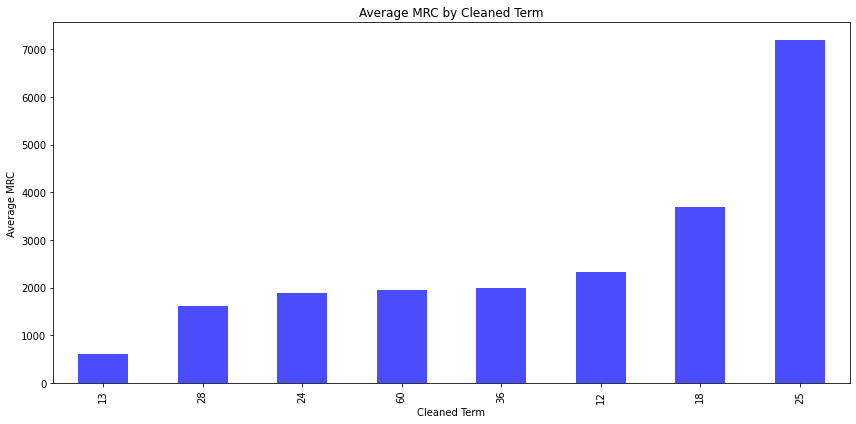

In [557]:
clean_term_avg = filter_state_data.groupby('Term_Cleaned')['MRC'].mean().sort_values()


plt.figure(figsize=(12, 6))
clean_term_avg.plot(kind='bar', color='blue', alpha=0.7)
plt.title('Average MRC by Cleaned Term')
plt.xlabel('Cleaned Term')
plt.ylabel('Average MRC')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [558]:
# filter_state_data['Average_ppm'] = filter_state_data['MRC'] / filter_state_data['Term_Cleaned'].astype(float)

In [559]:
# print(cleaned_term_avg[100:120])

In [560]:
# filter_state_data[filter_state_data['Average_ppm'].isna()]

In [561]:
filter_state_data['Port Speed'].unique()

array(['100G', '1G', '5Mb', '10Mb', '20mB', '200Mb', '10G', '2.5G', '500',
       '100', '1000', '600', '100Mb', '100 Mbps', '20', '50', '100M',
       '40M', '60M', 'DF', '250Mb', '10G Wave', '200', '20M', '80M', '2G',
       '400 Mbps', '2G ', '100 Mbs', '50Mb', '10G ', '1G Protected',
       '10G Protected', ' 10G', '10G Unprotected', '60', '80', '40G',
       '200M', '50Mbps', '300M', '250M', '400M', '500Mb', '10M', '50M',
       '100/25', '500M', '300', '250Mbps', '300Mbps', '500Mbps', '1000M',
       '300Mb', '1G Wave', '100/100', '300/300', '150/25', '100Mbs',
       '300Mbs', '80mb', nan, '100/20', '150/20', '1000/200', '1000/100',
       '250', '3Mb', '1G Protected (MPLS)', '1G P2P LL', '5G', '2.5',
       'P2P evpl', '10', '20Mb', '10Mb (20M quoted)', '10M ', '100Mbps',
       '10Mbps', '10 Mbps', '100mps', '1G CIR', '2G CIR ', '10G CIR',
       '10G CIR ', '45M', '500/500', '200/200', '1000Mb', '1G ',
       '1G not 50Mb', '12', '24', '50mb', '1G or 10G', '10Gb', '150M',
   

In [562]:
import re

def clean_port_speed(value):
    if pd.isna(value):
        return None

    value = value.strip().lower()


    numbers = [float(n) for n in re.findall(r"[\d\.]+", value)]

    if not numbers:
        return None

    max_value = max(numbers)


    if "g" in value:
        max_value *= 1000

    return int(max_value)


data = pd.DataFrame({'Port Speed': [
    '100G', '1G', '5Mb', '10Mb', '20mB', '200Mb', '10G', '2.5G', '500',
    '100', '1000', '600', '100Mb', '100 Mbps', '20', '50', '100M',
    '100/25', '500/500', '1000/100', '1G Protected', '10G Wave', '10M',
    '100 Mbps', '10 Mbps', '1G CIR', '1G not 50Mb', 'P2P evpl', '10Gb'
]})

filter_state_data['Port_Speed_Mbps'] = filter_state_data['Port Speed'].apply(clean_port_speed)


filter_state_data['Port_Speed_Mbps']


3       100000.0
7       100000.0
8       100000.0
9       100000.0
12      100000.0
          ...   
7826      1000.0
7827      1000.0
7828      1000.0
7829      1000.0
7830      1000.0
Name: Port_Speed_Mbps, Length: 4981, dtype: float64

In [563]:
filter_state_data['Port_Speed_Mbps'].unique()

array([1.0e+05, 1.0e+03, 5.0e+00, 1.0e+01, 2.0e+01, 2.0e+02, 1.0e+04,
       2.5e+03, 5.0e+02, 1.0e+02, 6.0e+02, 5.0e+01, 4.0e+01, 6.0e+01,
           nan, 2.5e+02, 8.0e+01, 2.0e+03, 4.0e+02, 4.0e+04, 3.0e+02,
       1.5e+02, 3.0e+00, 5.0e+03, 2.0e+00, 4.5e+01, 5.0e+04, 1.2e+01,
       2.4e+01])

In [564]:
overall_median_speed = filter_state_data['Port_Speed_Mbps'].median()
filter_state_data['Port_Speed_Mbps'].fillna(overall_median_speed, inplace=True)


In [565]:
filter_state_data["row_id"] = filter_state_data.index

In [566]:
filter_state_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4981 entries, 3 to 7830
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rec Num                    4981 non-null   float64
 1   RFQ                        4981 non-null   object 
 2   Date requested             4947 non-null   object 
 3   Date Received              4524 non-null   object 
 4   A Loc Address              4946 non-null   object 
 5   A Loc City                 4874 non-null   object 
 6   A Loc State                4832 non-null   object 
 7   A Loc Zip                  3912 non-null   object 
 8   Z Loc Address              4365 non-null   object 
 9   Z Loc City                 4278 non-null   object 
 10  Z Loc State                4224 non-null   object 
 11  Z Loc Zip                  3255 non-null   object 
 12  Cir Type                   4976 non-null   object 
 13  Port Speed                 4768 non-null   object 
 1

In [567]:
# filter_state_data['price_per_mbps'] = 

In [568]:
import pandas as pd
import re

class_conditions = {
    "Broadband": ["broadband"],  
    "DarkFiber": ["DF", "dark fiber"],  
    "DIA": ["DIA"],  
    "EVPL": ["EVPL", "Epath"],  
    "EPL": ["EPL", "EPLS", "Ethernet"],  
    "Wavelength": ["Wave"],  
    "Microwave": ["Microwave"],  
    "MPLS": ["MPLS"]  
}

def classify_text(text):
    if not isinstance(text, str):
        return "None"
    
    text = text.strip().lower()

    if re.match(r'^(epl|epls|ethernet)\b', text):
        return "EPL"
    
    if re.match(r'^wave\b', text):
        return "Wavelength"
    
    if re.match(r'^eline\b', text):
        return "E_Line"

    if "new wave/epl" in text:
        return "Wavelength"

    if "protected epl/wave" in text:
        return "EPL"

    if "mpls ethernet" in text:
        return "MPLS"

    if text == "1g broadband (quoted dia)":
        return "DIA"

    classes = set()
    for class_name, keywords in class_conditions.items():
        if any(re.search(rf'\b{kw.lower()}\b', text) for kw in keywords):
            classes.add(class_name)

    return ', '.join(sorted(classes)) if classes else "None"

filter_state_data['generalized_Cir'] = filter_state_data['Cir Type'].apply(classify_text)

# print(filter_state_data[['Cir Type', 'generalized_Cir']].head(20))


In [569]:
filter_state_data['generalized_Cir'].unique()

array(['None', 'Wavelength', 'EVPL', 'EPL', 'DIA', 'Broadband',
       'DarkFiber', 'E_Line', 'MPLS', 'Microwave'], dtype=object)

In [570]:
filter_state_data[filter_state_data['generalized_Cir']=='DIA']

,Rec Num,RFQ,Date requested,Date Received,A Loc Address,A Loc City,A Loc State,A Loc Zip,Z Loc Address,Z Loc City,...,Term,Provider,A Loc Local Loop Provider,MRC,NRC,RTD Latency,Term_Cleaned,Port_Speed_Mbps,row_id,generalized_Cir
104,4814.0,RFQ-247,4/10/2019,4/10/2019,3455 Peachtree Road,atlanta,ga,30326,NaN,NaN,...,36,Verizon,NaN,450.0,$0,NaN,36,100.0,104,DIA
105,4815.0,RFQ-247,4/10/2019,4/10/2019,205 N. Michigan Avenue,chicago,il,60601,NaN,NaN,...,36,Verizon,NaN,450.0,$0,NaN,36,100.0,105,DIA
106,4816.0,RFQ-247,4/10/2019,4/10/2019,150 South Fifth Street,minneapolis,mn,55402,NaN,NaN,...,36,Verizon,NaN,1845.0,$0,NaN,36,100.0,106,DIA
107,4817.0,RFQ-247,4/10/2019,4/10/2019,3455 Peachtree Road,atlanta,ga,30326,NaN,NaN,...,36,AT&T,NaN,842.0,NaN,NaN,36,100.0,107,DIA
108,4818.0,RFQ-247,4/10/2019,4/10/2019,205 N. Michigan Avenue,chicago,il,60601,NaN,NaN,...,36,AT&T,NaN,842.0,NaN,NaN,36,100.0,108,DIA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7593,13013.0,RFQ-622,12/13/2023,12/14/2023,626 Wilshire Blvd,los angeles,ca,90017,NaN,NaN,...,36,Spectrum,Spectrum,1499.0,$250,45 ms,36,1000.0,7593,DIA
7594,13014.0,RFQ-622,12/13/2023,12/14/2023,1888 S Century Park E,los angeles,ca,90067,NaN,NaN,...,36,Spectrum,Spectrum,999.0,$250,45 ms,36,1000.0,7594,DIA
7595,13015.0,RFQ-622,12/13/2023,12/21/2023,18 King St East,toronto,on,M5C 1C4,NaN,NaN,...,36,BCE,BCE,459.0,$0,NaN,36,1000.0,7595,DIA
7596,13016.0,RFQ-622,12/13/2023,12/18/2023,18 King St East,toronto,on,M5C 1C4,NaN,NaN,...,36,Shaw/Rogers,Beanfield,650.0,$500,NaN,36,1000.0,7596,DIA


In [571]:
filtered_data = filter_state_data[filter_state_data['generalized_Cir']!='None']
filtered_data

,Rec Num,RFQ,Date requested,Date Received,A Loc Address,A Loc City,A Loc State,A Loc Zip,Z Loc Address,Z Loc City,...,Term,Provider,A Loc Local Loop Provider,MRC,NRC,RTD Latency,Term_Cleaned,Port_Speed_Mbps,row_id,generalized_Cir
8,4657.0,RFQ-234,2/26/2019,2/28/2019,755 Secaucus,secaucus,nj,07094,2905 Diehl Rd,Aurora,...,12,Zayo,NaN,10000.0,"$3,000",22.5ms,12,100000.0,8,Wavelength
9,4658.0,RFQ-234,2/26/2019,2/28/2019,755 Secaucus,secaucus,nj,07094,2905 Diehl Rd,Aurora,...,36,Zayo,NaN,7500.0,"$3,000",22.5ms,36,100000.0,9,Wavelength
12,4661.0,RFQ-234,2/22/2019,2/22/2019,1400 Federal,carteret,nj,07008,350 East Cermak,Chicago,...,36,Verizon,NaN,5500.0,$0,15ms,36,100000.0,12,EVPL
13,4662.0,RFQ-234,2/22/2019,2/22/2019,1400 Federal,carteret,nj,07008,350 East Cermak,Chicago,...,36,Verizon,NaN,8163.0,$0,20ms,36,100000.0,13,EVPL
18,4667.0,RFQ-234,2/22/2019,NaN,755 Secaucus,secaucus,nj,07094,2905 Diehl Rd,Aurora,...,36,Level 3 (Centurylink),NaN,8139.0,"$2,500",22.697MS,36,100000.0,18,EVPL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7826,13302.0,RFQ-628.1,NaN,NaN,9021 Bennett Creek Blvd,frederick,md,21704,"21715 Filigree Court, Floor 1",Ashburn,...,24,ORN,One Ring Networks,1350.0,$600,NaN,24,1000.0,7826,Microwave
7827,13303.0,RFQ-628.1,NaN,NaN,9021 Bennett Creek Blvd,frederick,md,21704,"21715 Filigree Court, Floor 1",Ashburn,...,36,ORN,One Ring Networks,1225.0,$600,NaN,36,1000.0,7827,Microwave
7828,13304.0,RFQ-628.2,2/8/2024,2/13/2024,Tufsteen 1,hoofddorp,netherlands,2132 NT,Luttenbergweg 4,Amsterdam,...,12,Colt,Eurofiber,795.0,$738,NaN,12,1000.0,7828,Microwave
7829,13305.0,RFQ-628.2,2/8/2024,2/13/2024,Tufsteen 1,hoofddorp,netherlands,2132 NT,Luttenbergweg 4,Amsterdam,...,24,Colt,Eurofiber,777.0,$726,NaN,24,1000.0,7829,Microwave


In [572]:
filtered_data['A Loc State'].unique()

array(['nj', 'dc', 'va', 'ks', 'tx', 'uk', 'ga', 'il', 'mn', 'ny',
       'germany', 'co', 'ct', 'oh', 'ca', 'south kensington', 'wa',
       'ireland', 'hong kong', 'peru', nan, 'mexico', 'india', 'china',
       'california', 'ontario', 'ky', 'russia', 'md', 'south africa',
       'netherlands', 'japan', 'france', 'switzerland', 'italy', 'sc',
       'ut', 'pa', 'uae', 'fl', 'pud - china', 'brazil', 'sweden',
       'australia', 'canada', 'nicaragua', 'honduras', 'ma', 'ok',
       'poland', 'czech republic', 'indonesia', 'new zealand', 'new york',
       'mi', 'tn', 'on', 'nsw-australia', 'cyprus', 'nc', 'wi', 'az',
       'or', 'romania', 'spain', 'colombia', 'mo', 'belgium', 'taiwan'],
      dtype=object)

In [573]:
filtered_data['generalized_Cir'] = filtered_data['generalized_Cir'].astype(str).str.lower()
filtered_data['generalized_Cir'].unique()

/var/folders/t2/q9fs839s4l96y0sbpzp96jr40000gn/T/ipykernel_83963/252006231.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['generalized_Cir'] = filtered_data['generalized_Cir'].astype(str).str.lower()


array(['wavelength', 'evpl', 'epl', 'dia', 'broadband', 'darkfiber',
       'e_line', 'mpls', 'microwave'], dtype=object)

In [574]:
org_final_data = filtered_data

In [575]:
from sklearn.preprocessing import LabelEncoder
import pickle

label_encoders = {}  

for col in ['A Loc State', 'generalized_Cir']:
    label_enc = LabelEncoder()
    filtered_data[col + '_Freq'] = label_enc.fit_transform(filtered_data[col])
    label_encoders[col] = label_enc

# Drop the original categorical columns
filtered_data.drop(columns=['A Loc State', 'generalized_Cir'], inplace=True)

# Optionally, save the encoders using pickle
with open("label_encoders.pkl", "wb") as f:
    pickle.dump(label_encoders, f)


/var/folders/t2/q9fs839s4l96y0sbpzp96jr40000gn/T/ipykernel_83963/136176722.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data[col + '_Freq'] = label_enc.fit_transform(filtered_data[col])
/var/folders/t2/q9fs839s4l96y0sbpzp96jr40000gn/T/ipykernel_83963/136176722.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data[col + '_Freq'] = label_enc.fit_transform(filtered_data[col])
/var/folders/t2/q9fs839s4l96y0sbpzp96jr40000gn/T/ipykernel_83963/136176722.py:12: SettingWithCopyWarning: 
A

In [576]:
print(label_enc.classes_)  # Lists all unique class names in order
print(dict(zip(label_enc.classes_, range(len(label_enc.classes_)))))  # Shows class-to-label mapping


['broadband' 'darkfiber' 'dia' 'e_line' 'epl' 'evpl' 'microwave' 'mpls'
 'wavelength']
{'broadband': 0, 'darkfiber': 1, 'dia': 2, 'e_line': 3, 'epl': 4, 'evpl': 5, 'microwave': 6, 'mpls': 7, 'wavelength': 8}


In [577]:
filtered_data.columns

Index(['Rec Num', 'RFQ', 'Date requested', 'Date Received', 'A Loc Address',
       'A Loc City', 'A Loc Zip', 'Z Loc Address', 'Z Loc City', 'Z Loc State',
       'Z Loc Zip', 'Cir Type', 'Port Speed', 'Term', 'Provider',
       'A Loc Local Loop Provider', 'MRC', 'NRC', 'RTD Latency',
       'Term_Cleaned', 'Port_Speed_Mbps', 'row_id', 'A Loc State_Freq',
       'generalized_Cir_Freq'],
      dtype='object')

In [578]:
import pandas as pd

# Calculate mean MRC for each provider
provider_mrc_mean = filtered_data.groupby("Provider")["MRC"].median()

# Map the provider column to its corresponding mean MRC value
filtered_data["Provider_median_encoding"] = filtered_data["Provider"].map(provider_mrc_mean)

# Check the encoding
print(filtered_data[["Provider", "Provider_median_encoding"]].drop_duplicates().sort_values(by="Provider_median_encoding", ascending=False))


provider_encoding = filtered_data[["Provider", "Provider_median_encoding"]].drop_duplicates().sort_values(by="Provider_median_encoding", ascending=False)
provider_encoding.to_csv('provider_encoding.csv', header=True)

import pickle

# Save provider mean MRC encoding to a file
with open("provider_mrc_mean.pkl", "wb") as f:
    pickle.dump(provider_mrc_mean, f)


                   Provider  Provider_median_encoding
4244                 Spread                    8000.0
18    Level 3 (Centurylink)                    7452.0
837                     NTT                    7315.0
5086                     DU                    6805.0
7463            DigitalWell                    5556.0
...                     ...                       ...
4158                   INAP                     432.0
388                    MWEB                     415.0
412                     Vox                     315.0
1769                Xfinity                     200.0
3775              Earthlink                      92.0

[115 rows x 2 columns]


/var/folders/t2/q9fs839s4l96y0sbpzp96jr40000gn/T/ipykernel_83963/2975951924.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["Provider_median_encoding"] = filtered_data["Provider"].map(provider_mrc_mean)


In [579]:
provider_data = filtered_data[["Provider", "Provider_median_encoding"]].drop_duplicates().sort_values(by="Provider_median_encoding", ascending=False)

provider_counts = filtered_data['Provider'].value_counts(sort=True)

provider_counts.to_csv('provider_counts.csv', header=True)


In [ ]:
provider_counts

Provider
Zayo            599
Verizon         439
Centurylink     363
Colt            296
AT&T            244
               ... 
Colt              1
Centurylink       1
DigitalWell       1
INAP              1
Shaw/Rogers       1
Name: count, Length: 115, dtype: int64

In [592]:
filtered_data[filtered_data['Provider']=='Colt']

,Rec Num,RFQ,Date requested,Date Received,A Loc Address,A Loc City,A Loc Zip,Z Loc Address,Z Loc City,Z Loc State,...,RTD Latency,Term_Cleaned,Port_Speed_Mbps,row_id,A Loc State_Freq,generalized_Cir_Freq,Provider_median_encoding,Provider_encoded,MRC_per_Mbps,Avg_MRC_per_Mbps
50,4800.0,RFQ-246,4/8/2019,4/9/2019,Coriander Ave,london,NaN,Kansakoulukuja 3,Helsinki,Finland,...,NaN,12,500.0,94,63,4,797.5,22,2.0000,1.745679
51,4801.0,RFQ-246,4/8/2019,4/9/2019,Coriander Ave,london,NaN,Iso-Roobertinkatu 21-25,Helsinki,Finland,...,NaN,12,500.0,95,63,4,797.5,22,2.0000,1.745679
52,4802.0,RFQ-246,4/8/2019,4/9/2019,6 Greenwich View Place Millharbour,london,NaN,Kansakoulukuja 3,Helsinki,Finland,...,NaN,12,500.0,96,63,4,797.5,22,2.0000,1.745679
53,4803.0,RFQ-246,4/8/2019,4/9/2019,6 Greenwich View Place Millharbour,london,NaN,Iso-Roobertinkatu 21-25,Helsinki,Finland,...,NaN,12,500.0,97,63,4,797.5,22,2.0000,1.745679
58,4812.0,RFQ-246,4/9/2019,4/9/2019,6 Greenwich View Place Millharbour,london,NaN,2 Buckingham,Slough,UK,...,NaN,12,500.0,102,63,4,797.5,22,0.6200,1.745679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4379,12813.0,RFQ-610,8/21/2023,8/21/2023,8 Buckingham Ave,slough,SL1 4NB,121-127 Kruppstrasse,Frankfurt,Germany,...,12.56,12,10000.0,7405,63,8,797.5,22,0.0447,1.745679
4380,12814.0,RFQ-610,8/21/2023,8/21/2023,8 Buckingham Ave,slough,SL1 4NB,121-127 Kruppstrasse,Frankfurt,Germany,...,12.56,24,10000.0,7406,63,8,797.5,22,0.0425,1.745679
4548,13304.0,RFQ-628.2,2/8/2024,2/13/2024,Tufsteen 1,hoofddorp,2132 NT,Luttenbergweg 4,Amsterdam,Netherlands,...,NaN,12,1000.0,7828,35,6,797.5,22,0.7950,1.745679
4549,13305.0,RFQ-628.2,2/8/2024,2/13/2024,Tufsteen 1,hoofddorp,2132 NT,Luttenbergweg 4,Amsterdam,Netherlands,...,NaN,24,1000.0,7829,35,6,797.5,22,0.7770,1.745679


In [581]:
provider_data[provider_data['Provider']=='Colt']

,Provider,Provider_median_encoding
94,Colt,797.5


In [582]:
filtered_data

,Rec Num,RFQ,Date requested,Date Received,A Loc Address,A Loc City,A Loc Zip,Z Loc Address,Z Loc City,Z Loc State,...,A Loc Local Loop Provider,MRC,NRC,RTD Latency,Term_Cleaned,Port_Speed_Mbps,row_id,A Loc State_Freq,generalized_Cir_Freq,Provider_median_encoding
8,4657.0,RFQ-234,2/26/2019,2/28/2019,755 Secaucus,secaucus,07094,2905 Diehl Rd,Aurora,IL,...,NaN,10000.0,"$3,000",22.5ms,12,100000.0,8,39,8,1400.0
9,4658.0,RFQ-234,2/26/2019,2/28/2019,755 Secaucus,secaucus,07094,2905 Diehl Rd,Aurora,IL,...,NaN,7500.0,"$3,000",22.5ms,36,100000.0,9,39,8,1400.0
12,4661.0,RFQ-234,2/22/2019,2/22/2019,1400 Federal,carteret,07008,350 East Cermak,Chicago,IL,...,NaN,5500.0,$0,15ms,36,100000.0,12,39,5,1313.0
13,4662.0,RFQ-234,2/22/2019,2/22/2019,1400 Federal,carteret,07008,350 East Cermak,Chicago,IL,...,NaN,8163.0,$0,20ms,36,100000.0,13,39,5,1313.0
18,4667.0,RFQ-234,2/22/2019,NaN,755 Secaucus,secaucus,07094,2905 Diehl Rd,Aurora,IL,...,NaN,8139.0,"$2,500",22.697MS,36,100000.0,18,39,5,7452.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7826,13302.0,RFQ-628.1,NaN,NaN,9021 Bennett Creek Blvd,frederick,21704,"21715 Filigree Court, Floor 1",Ashburn,VA,...,One Ring Networks,1350.0,$600,NaN,24,1000.0,7826,29,6,1350.0
7827,13303.0,RFQ-628.1,NaN,NaN,9021 Bennett Creek Blvd,frederick,21704,"21715 Filigree Court, Floor 1",Ashburn,VA,...,One Ring Networks,1225.0,$600,NaN,36,1000.0,7827,29,6,1350.0
7828,13304.0,RFQ-628.2,2/8/2024,2/13/2024,Tufsteen 1,hoofddorp,2132 NT,Luttenbergweg 4,Amsterdam,Netherlands,...,Eurofiber,795.0,$738,NaN,12,1000.0,7828,35,6,797.5
7829,13305.0,RFQ-628.2,2/8/2024,2/13/2024,Tufsteen 1,hoofddorp,2132 NT,Luttenbergweg 4,Amsterdam,Netherlands,...,Eurofiber,777.0,$726,NaN,24,1000.0,7829,35,6,797.5


In [583]:
import numpy as np

window_size = 10

def fill_with_median(window_data):

    valid_values = window_data.dropna()
    if len(valid_values) > 0:
        return valid_values.median()
    return np.nan


for col in ['Port_Speed_Mbps', 'A Loc State_Freq', 'Provider_median_encoding']:
    for i in range(window_size, len(filtered_data) - window_size):
        if pd.isna(filtered_data[col].iloc[i]):

            window_data = filtered_data[col].iloc[i - window_size:i + window_size + 1]
            filtered_data[col].iloc[i] = fill_with_median(window_data)


# print(final_data.isnull().sum())


In [584]:
filtered_data['Term_Cleaned'] = pd.to_numeric(filtered_data['Term_Cleaned'], errors='coerce')

filtered_data['Term_Cleaned']


/var/folders/t2/q9fs839s4l96y0sbpzp96jr40000gn/T/ipykernel_83963/2243208810.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Term_Cleaned'] = pd.to_numeric(filtered_data['Term_Cleaned'], errors='coerce')


8       12
9       36
12      36
13      36
18      36
        ..
7826    24
7827    36
7828    12
7829    24
7830    36
Name: Term_Cleaned, Length: 4551, dtype: int64

In [585]:
filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4551 entries, 8 to 7830
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rec Num                    4551 non-null   float64
 1   RFQ                        4551 non-null   object 
 2   Date requested             4517 non-null   object 
 3   Date Received              4159 non-null   object 
 4   A Loc Address              4523 non-null   object 
 5   A Loc City                 4489 non-null   object 
 6   A Loc Zip                  3612 non-null   object 
 7   Z Loc Address              3949 non-null   object 
 8   Z Loc City                 3900 non-null   object 
 9   Z Loc State                3846 non-null   object 
 10  Z Loc Zip                  2966 non-null   object 
 11  Cir Type                   4551 non-null   object 
 12  Port Speed                 4394 non-null   object 
 13  Term                       4551 non-null   object 
 1

In [586]:
filtered_data.columns

Index(['Rec Num', 'RFQ', 'Date requested', 'Date Received', 'A Loc Address',
       'A Loc City', 'A Loc Zip', 'Z Loc Address', 'Z Loc City', 'Z Loc State',
       'Z Loc Zip', 'Cir Type', 'Port Speed', 'Term', 'Provider',
       'A Loc Local Loop Provider', 'MRC', 'NRC', 'RTD Latency',
       'Term_Cleaned', 'Port_Speed_Mbps', 'row_id', 'A Loc State_Freq',
       'generalized_Cir_Freq', 'Provider_median_encoding'],
      dtype='object')

In [587]:
len(filtered_data['Provider'].unique())

115

In [588]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

filtered_data['Provider_encoded'] = le.fit_transform(filtered_data['Provider'])

filtered_data['Provider_encoded']


/var/folders/t2/q9fs839s4l96y0sbpzp96jr40000gn/T/ipykernel_83963/2257908100.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Provider_encoded'] = le.fit_transform(filtered_data['Provider'])


8       109
9       109
12       99
13       99
18       61
       ... 
7826     75
7827     75
7828     22
7829     22
7830     22
Name: Provider_encoded, Length: 4551, dtype: int64

In [589]:
filtered_data['MRC_per_Mbps'] = filtered_data['MRC'] / filtered_data['Port_Speed_Mbps']


provider_avg = filtered_data.groupby('Provider')['MRC_per_Mbps'].mean().reset_index()
provider_avg.columns = ['Provider', 'Avg_MRC_per_Mbps']
filtered_data = filtered_data.merge(provider_avg, on='Provider', how='left')


/var/folders/t2/q9fs839s4l96y0sbpzp96jr40000gn/T/ipykernel_83963/2179379077.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['MRC_per_Mbps'] = filtered_data['MRC'] / filtered_data['Port_Speed_Mbps']


In [530]:
len(filtered_data['Avg_MRC_per_Mbps'].unique())

115

In [287]:
filter_state_data = filter_state_data[filter_state_data['generalized_Cir'] != "None"]


In [151]:
features_1 = ['Port_Speed_Mbps', 'Term_Cleaned', 'A Loc State_Freq', 'Provider_median_encoding', 'generalized_Cir_Freq', 'row_id']

filtered_data[features_1]

,Port_Speed_Mbps,Term_Cleaned,A Loc State_Freq,Provider_median_encoding,generalized_Cir_Freq,row_id
8,100000.0,12,39,1400.0,8,8
9,100000.0,36,39,1400.0,8,9
12,100000.0,36,39,1313.0,5,12
13,100000.0,36,39,1313.0,5,13
18,100000.0,36,39,7452.0,5,18
...,...,...,...,...,...,...
7826,1000.0,24,29,1350.0,6,7826
7827,1000.0,36,29,1350.0,6,7827
7828,1000.0,12,35,797.5,6,7828
7829,1000.0,24,35,797.5,6,7829


In [152]:
filtered_data[features_1].info()

<class 'pandas.core.frame.DataFrame'>
Index: 4551 entries, 8 to 7830
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Port_Speed_Mbps           4551 non-null   float64
 1   Term_Cleaned              4551 non-null   int64  
 2   A Loc State_Freq          4551 non-null   int64  
 3   Provider_median_encoding  4551 non-null   float64
 4   generalized_Cir_Freq      4551 non-null   int64  
 5   row_id                    4551 non-null   int64  
dtypes: float64(2), int64(4)
memory usage: 248.9 KB


In [153]:
common_non_null_count = filtered_data[(filtered_data['MRC'].notna()) & 
                                      (filtered_data['generalized_Cir_Freq'].notna())]

print(f'Number of rows where both MRC and generalized_Cir are NOT NULL: {common_non_null_count}')


Number of rows where both MRC and generalized_Cir are NOT NULL:       Rec Num        RFQ Date requested Date Received  \
8      4657.0    RFQ-234      2/26/2019     2/28/2019   
9      4658.0    RFQ-234      2/26/2019     2/28/2019   
12     4661.0    RFQ-234      2/22/2019     2/22/2019   
13     4662.0    RFQ-234      2/22/2019     2/22/2019   
18     4667.0    RFQ-234      2/22/2019           NaN   
...       ...        ...            ...           ...   
7826  13302.0  RFQ-628.1            NaN           NaN   
7827  13303.0  RFQ-628.1            NaN           NaN   
7828  13304.0  RFQ-628.2       2/8/2024     2/13/2024   
7829  13305.0  RFQ-628.2       2/8/2024     2/13/2024   
7830  13306.0  RFQ-628.2       2/8/2024     2/13/2024   

                A Loc Address A Loc City A Loc Zip  \
8                755 Secaucus   secaucus     07094   
9                755 Secaucus   secaucus     07094   
12               1400 Federal   carteret     07008   
13               1400 Federal   car

In [154]:
features = [
    'Port_Speed_Mbps', 'Term_Cleaned', 'A Loc State_Freq', 'Provider_median_encoding',
    'generalized_Cir_Freq'
]

In [155]:
features

['Port_Speed_Mbps',
 'Term_Cleaned',
 'A Loc State_Freq',
 'Provider_median_encoding',
 'generalized_Cir_Freq']

In [156]:
mrc_missing = filtered_data[filtered_data['MRC'].isna()]
mrc_non_missing = filtered_data.dropna(subset=['MRC'])

In [157]:
mrc_non_missing.shape

(4551, 25)

In [158]:
features

['Port_Speed_Mbps',
 'Term_Cleaned',
 'A Loc State_Freq',
 'Provider_median_encoding',
 'generalized_Cir_Freq']

In [159]:
temp_features = ['Port_Speed_Mbps',
 'Term_Cleaned',
 'A Loc State_Freq',
#  'Z Loc State_Freq',
 'Provider_median_encoding',
 'generalized_Cir_Freq', 'MRC']

In [160]:
features

['Port_Speed_Mbps',
 'Term_Cleaned',
 'A Loc State_Freq',
 'Provider_median_encoding',
 'generalized_Cir_Freq']

In [161]:
mrc_non_missing[features]

,Port_Speed_Mbps,Term_Cleaned,A Loc State_Freq,Provider_median_encoding,generalized_Cir_Freq
8,100000.0,12,39,1400.0,8
9,100000.0,36,39,1400.0,8
12,100000.0,36,39,1313.0,5
13,100000.0,36,39,1313.0,5
18,100000.0,36,39,7452.0,5
...,...,...,...,...,...
7826,1000.0,24,29,1350.0,6
7827,1000.0,36,29,1350.0,6
7828,1000.0,12,35,797.5,6
7829,1000.0,24,35,797.5,6


In [162]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import RandomizedSearchCV

X = mrc_non_missing[features].values
y = mrc_non_missing['MRC'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


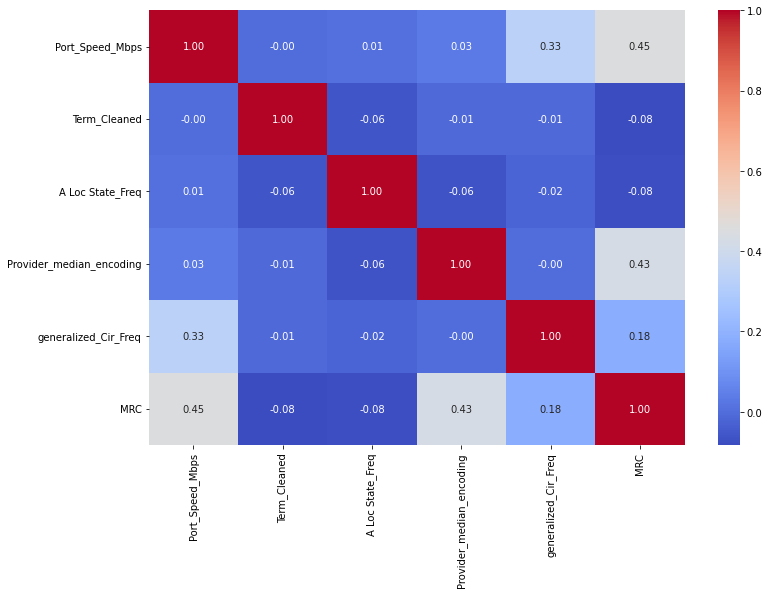

In [163]:
X1 = mrc_non_missing[temp_features].values



import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

corX = pd.DataFrame(X1, columns=temp_features)

# Compute correlation matrix
corr_matrix = corX.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=True, fmt=".2f")
plt.show()


In [164]:
X_test.shape

(911, 5)

In [165]:
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Define parameter grid for tuning
param_grid = {
    'n_estimators': [100, 300, 500],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0]
}

# Grid Search with 5-Fold Cross-Validation
grid_search = RandomizedSearchCV(xgb_model, param_grid, cv=5, scoring='neg_mean_absolute_error', n_iter=30, n_jobs=-1, verbose=1, random_state=42)

grid_search.fit(X_train, y_train)

# Get Best Model
best_xgb = grid_search.best_estimator_

# Make Predictions
y_pred = best_xgb.predict(X_test)

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)
print(f"Optimized XGBoost MAE: {mae}")


Fitting 5 folds for each of 30 candidates, totalling 150 fits
Optimized XGBoost MAE: 675.7271790897022


In [166]:
from sklearn.metrics import r2_score, mean_absolute_percentage_error

# R² Score
r2_xgb = r2_score(y_test, y_pred)
print(f"R² Score: {r2_xgb:.4f}")

# MAPE
mape_xgb = mean_absolute_percentage_error(y_test, y_pred)
print(f"MAPE: {mape_xgb * 100:.2f}%")  # Convert to percentage


R² Score: 0.6253
MAPE: 45.00%


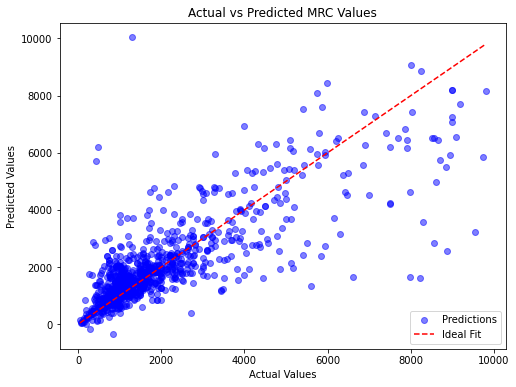

In [167]:
# Scatter plot of actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color="blue", label="Predictions")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="--", label="Ideal Fit")  # y=x line
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted MRC Values")
plt.legend()
plt.show()


In [168]:
import joblib

joblib.dump(best_xgb, "model_and_encoders/best_xgb_model.pkl")
print("Model saved successfully.")


Model saved successfully.


In [169]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error

# Define hyperparameter grid
param_grid = {
    'n_estimators': [200, 400, 600, 800, 1000],   # More trees
    'max_depth': [10, 20, 30, None],  # Allow unlimited depth
    'min_samples_split': [2, 5, 10],  # Minimum samples to split
    'min_samples_leaf': [1, 2, 4],  # Minimum samples per leaf
    'max_features': ['sqrt', 'log2', None]  # Feature selection
}

# Initialize model
rf = RandomForestRegressor(random_state=42)

# Randomized Search
random_search = RandomizedSearchCV(
    rf, param_distributions=param_grid,
    n_iter=15, scoring='neg_mean_absolute_error',
    cv=5, verbose=2, random_state=42, n_jobs=-1
)

# Train
random_search.fit(X_train, y_train)

# Best model
best_rf = random_search.best_estimator_

# Predictions
rf_predictions = best_rf.predict(X_test)

# Evaluate
rf_mae = mean_absolute_error(y_test, rf_predictions)
print(f"Optimized Random Forest MAE: {rf_mae}")
print(f"Best Parameters: {random_search.best_params_}")

Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV] END max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=800; total time=   1.8s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=800; total time=   1.8s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=800; total time=   1.8s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=800; total time=   1.7s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=800; total time=   1.7s
[CV] END max_depth=None, max_features=None, min_samples_leaf=2, min_samples_split=10, n_estimators=400; total time=   1.8s
[CV] END max_depth=None, max_features=None, min_samples_leaf=2, min_samples_split=10, n_estimators=400; total time=   1.7s
[CV] END max_depth=20, max_features=None, min_samples_leaf=1, min_samples_split=2, n_est

In [170]:
from sklearn.metrics import r2_score, mean_absolute_percentage_error

# R² Score
r2_rf = r2_score(y_test, rf_predictions)
print(f"R² Score: {r2_rf:.4f}")

# MAPE
mape_rf = mean_absolute_percentage_error(y_test, rf_predictions)
print(f"MAPE: {mape_rf * 100:.2f}%")  # Convert to percentage


R² Score: 0.5938
MAPE: 49.12%


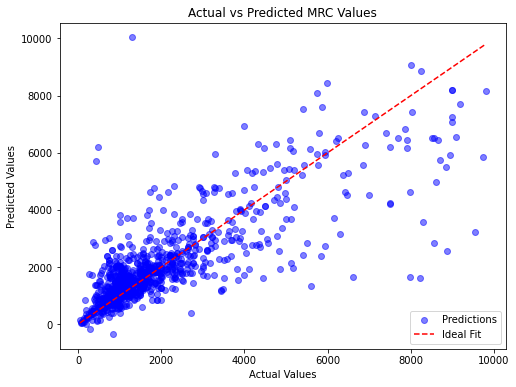

In [171]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color="blue", label="Predictions")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="--", label="Ideal Fit")  # y=x line
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted MRC Values")
plt.legend()
plt.show()


In [172]:
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error

svr_model = SVR(kernel='rbf', C=1.0, epsilon=0.1)
svr_model.fit(X_train, y_train)
svr_predictions = svr_model.predict(X_test)
svr_mae = mean_absolute_error(y_test, svr_predictions)
print(f"SVR MAE: {svr_mae}")


SVR MAE: 1152.4973453603216


In [173]:
from sklearn.metrics import r2_score, mean_absolute_percentage_error

# R² Score
r2_svr = r2_score(y_test, svr_predictions)
print(f"R² Score: {r2_svr:.4f}")

# MAPE
mape_svr = mean_absolute_percentage_error(y_test, svr_predictions)
print(f"MAPE: {mape_svr * 100:.2f}%")  # Convert to percentage


R² Score: -0.0677
MAPE: 76.53%


In [174]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error

knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)
knn_predictions = knn_model.predict(X_test)
knn_mae = mean_absolute_error(y_test, knn_predictions)
print(f"KNN MAE: {knn_mae}")


KNN MAE: 841.0206564215148


In [175]:
from sklearn.metrics import r2_score, mean_absolute_percentage_error

# R² Score
r2_knn = r2_score(y_test, knn_predictions)
print(f"R² Score: {r2_knn:.4f}")

# MAPE
mape_knn = mean_absolute_percentage_error(y_test, knn_predictions)
print(f"MAPE: {mape_knn * 100:.2f}%")  # Convert to percentage


R² Score: 0.5054
MAPE: 61.42%


In [176]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error

nn_model = MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)
nn_model.fit(X_train, y_train)
nn_predictions = nn_model.predict(X_test)
nn_mae = mean_absolute_error(y_test, nn_predictions)
print(f"Neural Network MAE: {nn_mae}")


Neural Network MAE: 930.5291474008246


In [177]:
from sklearn.metrics import r2_score, mean_absolute_percentage_error

# R² Score
r2_nn = r2_score(y_test, nn_predictions)
print(f"R² Score: {r2_nn:.4f}")

# MAPE
mape_nn = mean_absolute_percentage_error(y_test, nn_predictions)
print(f"MAPE: {mape_nn * 100:.2f}%")  # Convert to percentage


R² Score: 0.3794
MAPE: 68.14%


In [178]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error

dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)
dt_mae = mean_absolute_error(y_test, dt_predictions)
print(f"Decision Tree MAE: {dt_mae}")


Decision Tree MAE: 751.4998034761921


In [179]:
from sklearn.metrics import r2_score, mean_absolute_percentage_error

# R² Score
r2_dt = r2_score(y_test, dt_predictions)
print(f"R² Score: {r2_dt:.4f}")

# MAPE
mape_dt = mean_absolute_percentage_error(y_test, dt_predictions)
print(f"MAPE: {mape_dt * 100:.2f}%")  # Convert to percentage


R² Score: 0.4562
MAPE: 47.88%


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


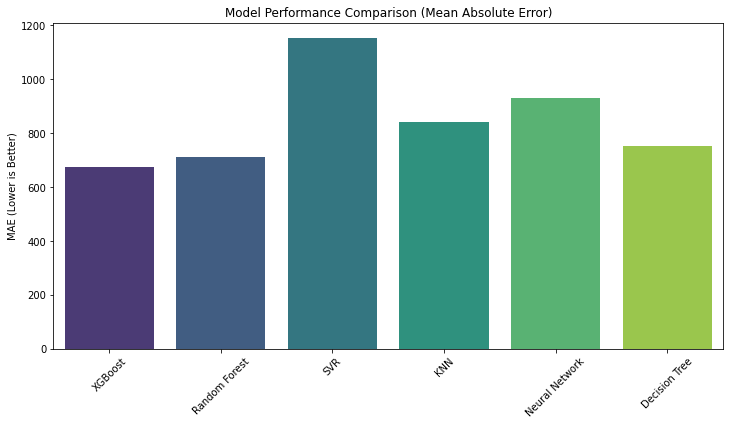

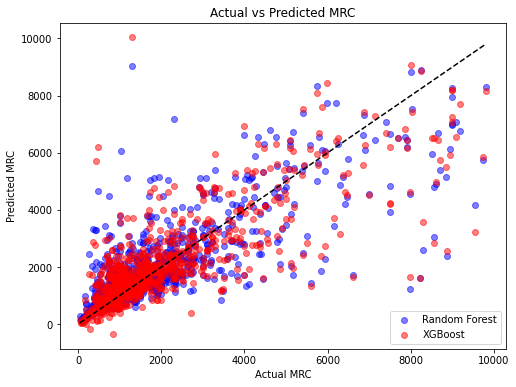

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


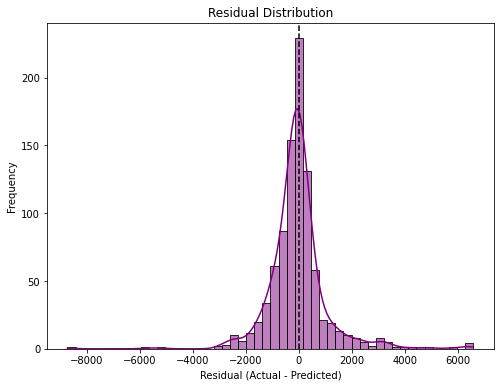

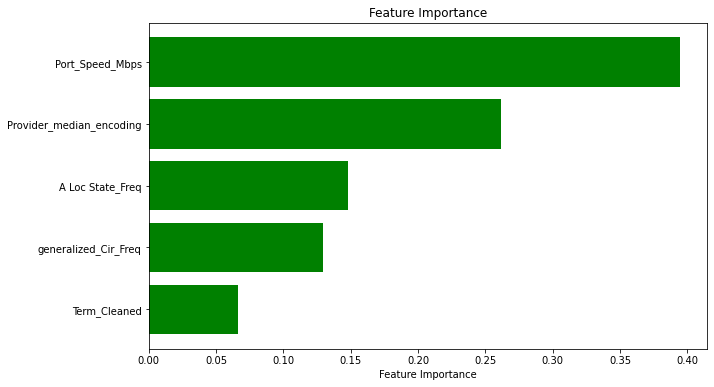

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


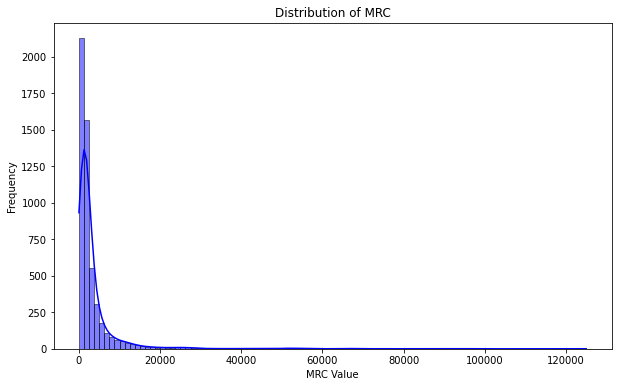

In [180]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Model MAE comparison
model_names = ["XGBoost", "Random Forest", "SVR", "KNN", "Neural Network", "Decision Tree"]
mae_values = [mae, rf_mae, svr_mae, knn_mae, nn_mae, dt_mae]

plt.figure(figsize=(12, 6))
sns.barplot(x=model_names, y=mae_values, palette="viridis")
plt.xticks(rotation=45)
plt.title("Model Performance Comparison (Mean Absolute Error)")
plt.ylabel("MAE (Lower is Better)")
plt.show()

# Actual vs Predicted MRC
plt.figure(figsize=(8, 6))
plt.scatter(y_test, rf_predictions, alpha=0.5, color="blue", label="Random Forest")
plt.scatter(y_test, y_pred, alpha=0.5, color="red", label="XGBoost")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="black", linestyle="--")  # Diagonal Line
plt.xlabel("Actual MRC")
plt.ylabel("Predicted MRC")
plt.title("Actual vs Predicted MRC")
plt.legend()
plt.show()

# Residual Plot (Random Forest)
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.histplot(residuals, bins=50, kde=True, color="purple")
plt.axvline(0, color='black', linestyle='--')
plt.title("Residual Distribution")
plt.xlabel("Residual (Actual - Predicted)")
plt.ylabel("Frequency")
plt.show()

# Feature Importance (Random Forest)
feature_importance = best_xgb.feature_importances_
sorted_idx = np.argsort(feature_importance)

plt.figure(figsize=(10, 6))
plt.barh(np.array(features)[sorted_idx], feature_importance[sorted_idx], color="green")
plt.xlabel("Feature Importance")
plt.title("Feature Importance")
plt.show()

# MRC Distribution
plt.figure(figsize=(10, 6))
sns.histplot(filtered_df['MRC'], bins=100, kde=True, color="blue")
plt.title("Distribution of MRC")
plt.xlabel("MRC Value")
plt.ylabel("Frequency")
plt.show()


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


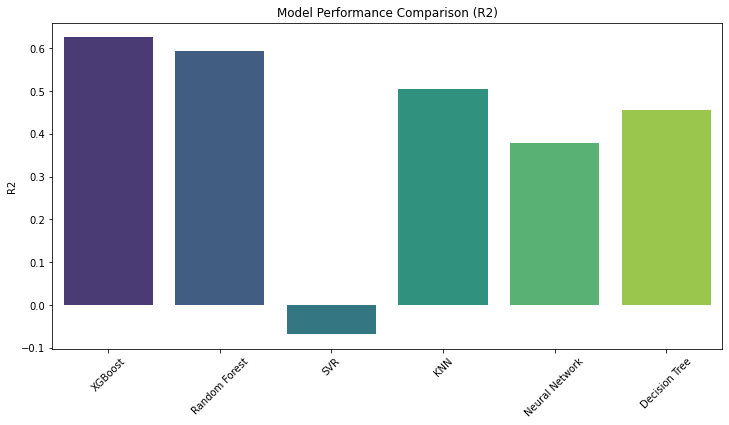

In [181]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Model MAE comparison
model_names = ["XGBoost", "Random Forest", "SVR", "KNN", "Neural Network", "Decision Tree"]
mae_values = [r2_xgb, r2_rf, r2_svr, r2_knn, r2_nn, r2_dt]

plt.figure(figsize=(12, 6))
sns.barplot(x=model_names, y=mae_values, palette="viridis")
plt.xticks(rotation=45)
plt.title("Model Performance Comparison (R2)")
plt.ylabel("R2")
plt.show()


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


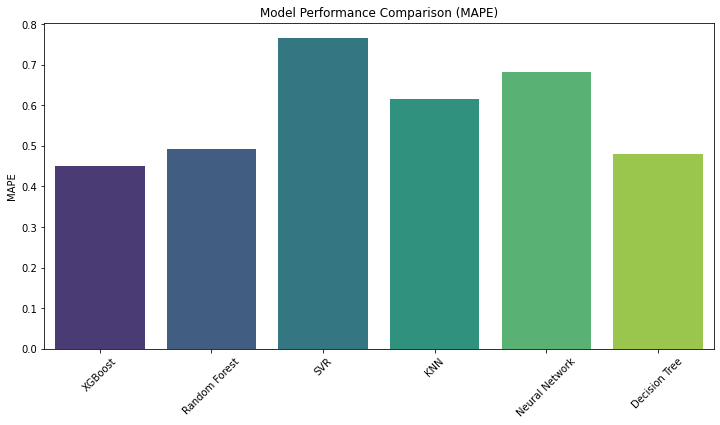

In [182]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Model MAE comparison
model_names = ["XGBoost", "Random Forest", "SVR", "KNN", "Neural Network", "Decision Tree"]
mae_values = [mape_xgb, mape_rf, mape_svr, mape_knn, mape_nn, mape_dt]

plt.figure(figsize=(12, 6))
sns.barplot(x=model_names, y=mae_values, palette="viridis")
plt.xticks(rotation=45)
plt.title("Model Performance Comparison (MAPE)")
plt.ylabel("MAPE")
plt.show()
